In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
transitions = pd.read_csv("./results/results.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
Activity = pd.read_csv("./results/Activity.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
transitions['f1'] = 2 * (transitions['precision'] * transitions['recall']) / (transitions['precision'] + transitions['recall'])
Activity['f1'] = 2 * (Activity['precision'] * Activity['recall']) / (Activity['precision'] + Activity['recall'])
sample = pd.read_csv("./results/results_sample.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
Activity_Patterns = pd.read_csv("./results/activity_onlypatterns.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
Transitions_Patterns = pd.read_csv("./results/transition_only_patterns.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)


In [3]:
transitions.head(5)

,deviation_rate,injected,accuracy_score,ball_acc,precision,recall,roc_auc_score,fpr,tpf,thresholds,f1
0,5,0,0.998601,0.4997,0.00,0.000,0.4997,[0.00000000e+00 5.99880024e-04 1.00000000e+00],[0. 0. 1.],[2. 1. 0.],NaN
1,5,50,0.998302,0.6869,0.20,0.375,0.6869,[0. 0.00119976 1. ],[0. 0.375 1. ],[2. 1. 0.],0.260870
2,5,100,0.998402,0.7494,0.25,0.500,0.7494,[0. 0.00119976 1. ],[0. 0.5 1. ],[2. 1. 0.],0.333333
3,5,250,0.998402,0.8743,0.30,0.750,0.8743,[0. 0.00139972 1. ],[0. 0.75 1. ],[2. 1. 0.],0.428571
4,5,500,0.999201,0.9996,0.50,1.000,0.9996,[0.00000000e+00 7.99840032e-04 1.00000000e+00],[0. 1. 1.],[2. 1. 0.],0.666667


In [4]:
Activity['ball_acc'].round(2).to_list()

[0.5,
 0.75,
 0.75,
 0.87,
 0.93,
 1.0,
 0.87,
 0.99,
 0.93,
 0.5,
 0.5,
 0.75,
 0.87,
 0.93,
 0.93,
 0.93,
 0.99,
 0.99,
 0.5,
 0.69,
 0.69,
 0.81,
 0.87,
 0.93,
 1.0,
 0.93,
 0.93,
 0.5,
 0.62,
 0.62,
 0.69,
 0.93,
 1.0,
 1.0,
 0.99,
 0.99,
 0.5,
 0.75,
 0.69,
 0.87,
 1.0,
 1.0,
 0.94,
 0.93,
 0.93,
 0.5,
 0.62,
 0.81,
 1.0,
 0.93,
 0.93,
 1.0,
 1.0,
 0.93]

In [5]:
# function to create a plot for a specific column, per deviation_rate
# x-axis: amount_injected
# y-axis: column
def plot_column(csv,column, title, col='injected',legend=True):
    # csv = csv[csv['injected'] != 5000]
    fig, ax = plt.subplots()
    for deviation_rate in csv.deviation_rate.unique():
        csv[csv.deviation_rate == deviation_rate].plot(x=col, y=column, ax=ax, label=deviation_rate)
    ax.set_title(title)
    ax.set_xlabel("nr of injected sessions")
    ax.set_ylabel('score')
    if legend:
        ax.legend(loc='best')
    else:
        ax.get_legend().remove()
    plt.show()


In [9]:
# function to create a plot for a specific column,it takes the average of all deviation_rates
# x-axis: amount_injected
# y-axis: column
def plot_column_average(csv,column, title, col='injected',legend=True):
    # csv = csv[csv['injected'] != 5000]
    fig, ax = plt.subplots()
    csv.groupby(col).mean().plot(y=column, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("nr of injected sessions")
    ax.set_ylabel('score')
    if legend:
        ax.legend(loc='best')
    else:
        ax.get_legend().remove()
    plt.show()

In [18]:
# function that plots the average of all deviation_rates for a specific column for 2 csv's
def plot_column_average_2(csv1,csv2,column, title, col='injected',legend=True):
    # csv = csv[csv['injected'] != 5000]
    fig, ax = plt.subplots()
    csv1.groupby(col).mean().plot(y=column, ax=ax, label='Transitions')
    csv2.groupby(col).mean().plot(y=column, ax=ax, label='Activities')
    ax.set_title(title)
    ax.set_xlabel("nr of injected sessions")
    ax.set_ylabel('score')
    if legend:
        ax.legend(loc='best')
    else:
        ax.get_legend().remove()
    plt.show()

In [6]:
# function to create a bar plot for a specific column, per deviation_rate
def plot_column_bar(csv,column, title,col='injected',legend=True):
    # csv = csv[csv['injected'] != 5000]
    fig, ax = plt.subplots()
    for deviation_rate in csv.deviation_rate.unique():
        csv[csv.deviation_rate == deviation_rate].plot.bar(x=col, y=column, ax=ax, label=deviation_rate)
    ax.set_title(title)
    ax.set_xlabel("nr of injected sessions")
    ax.set_ylabel('score')
    if legend:
        ax.legend(loc='best')
    else:
        ax.get_legend().remove()
    # add value on bar chart .02 decimal
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()

In [21]:
# function to show the average of 2 columns
def average_column(csv,column1,column2, title, col='injected',legend=True):
    fig, ax = plt.subplots()
    csv.groupby(col).mean().plot(y=column1, ax=ax, label='precision')
    csv.groupby(col).mean().plot(y=column2, ax=ax, label='recall')
    ax.set_title(title)
    ax.set_xlabel("nr of injected sessions")
    ax.set_ylabel('score')
    if legend:
        ax.legend(loc='best')
    else:
        ax.get_legend().remove()
    plt.show()
    

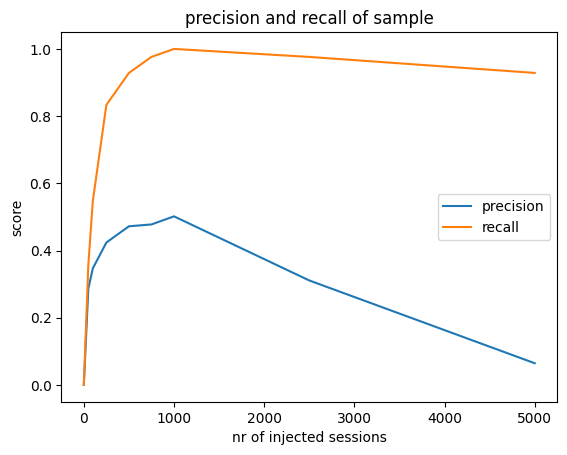

In [22]:
smp = average_column(sample,'precision','recall','precision and recall of sample',col='injected',legend=True)

transitions

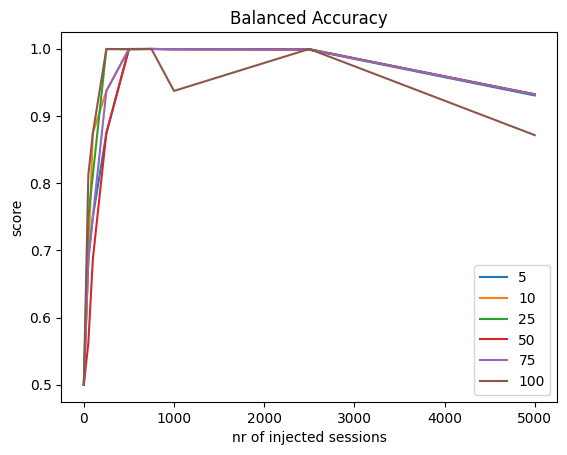

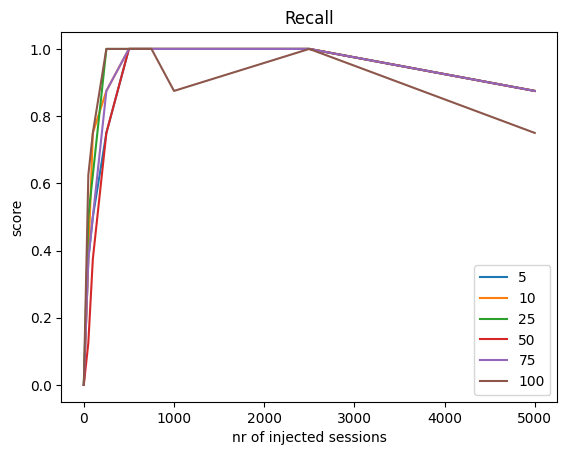

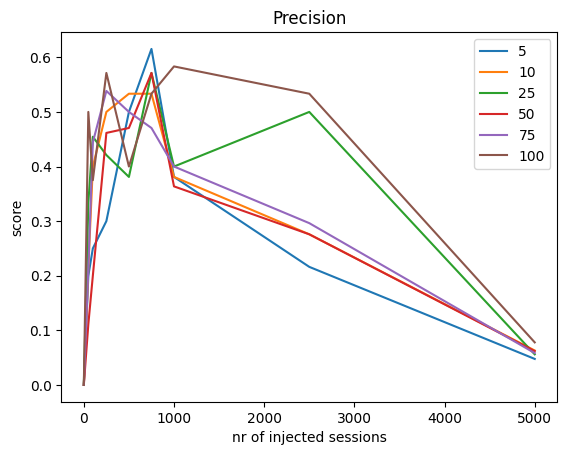

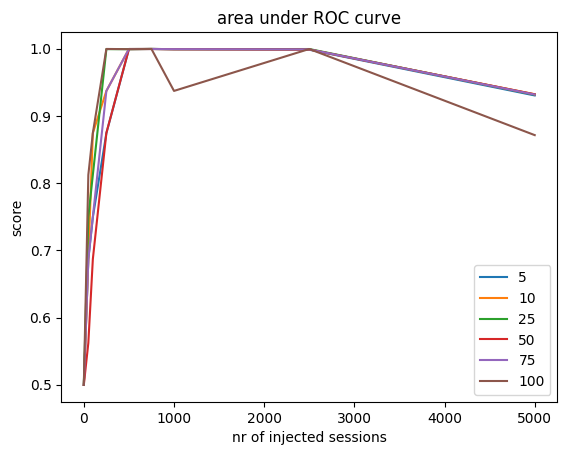

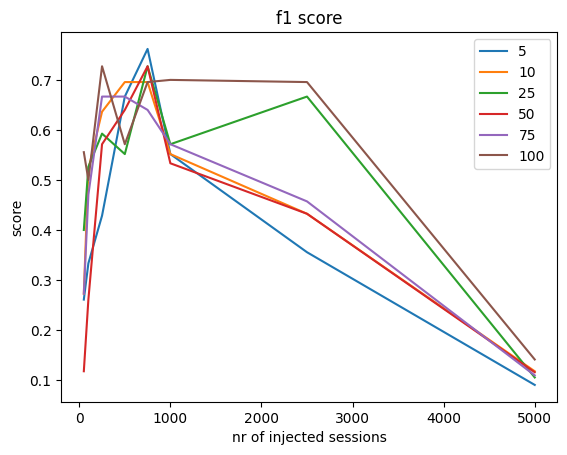

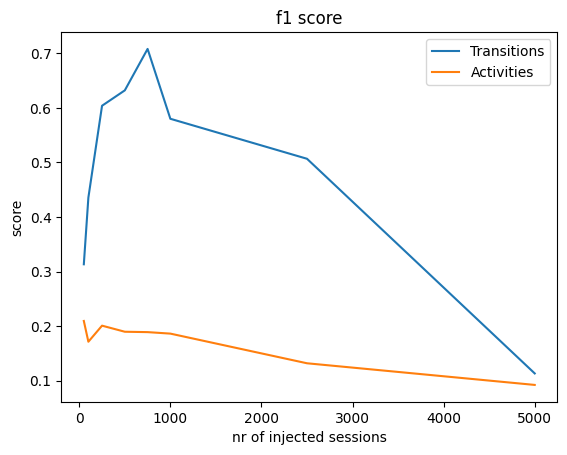

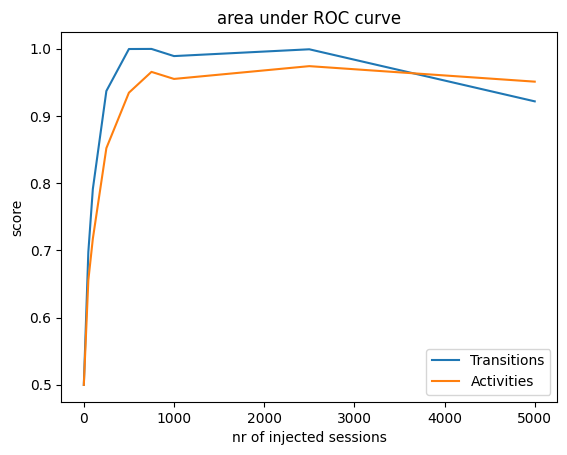

In [20]:
balanced_accuracy = plot_column(transitions,'ball_acc',"Balanced Accuracy")
recall = plot_column(transitions,'recall',"Recall")
precision = plot_column(transitions,'precision',"Precision")
roc = plot_column(transitions,'roc_auc_score','area under ROC curve') 
f1 = plot_column(transitions,'f1','f1 score')
f2 = plot_column_average_2(transitions,Activity,'f1','f1 score')
ar = plot_column_average_2(transitions,Activity,'roc_auc_score','area under ROC curve')

Activity

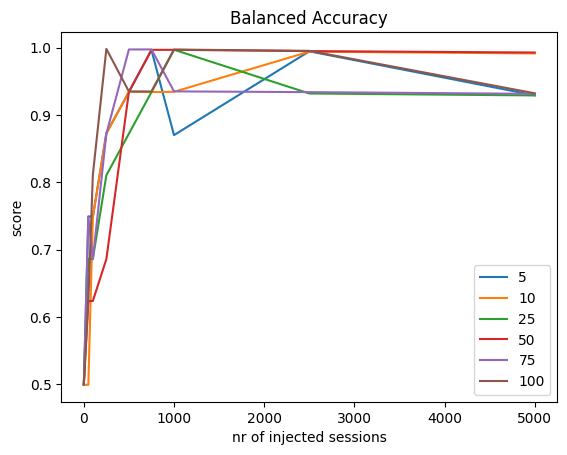

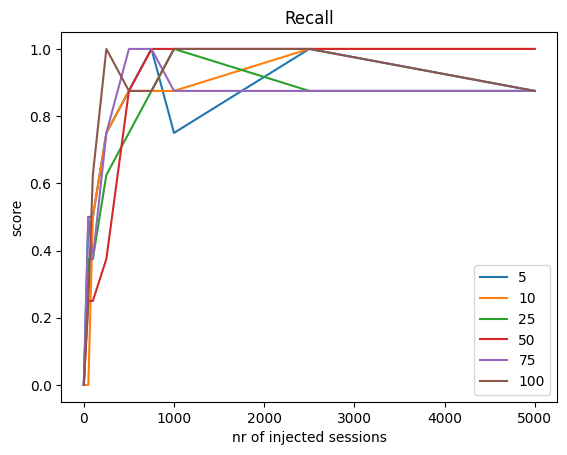

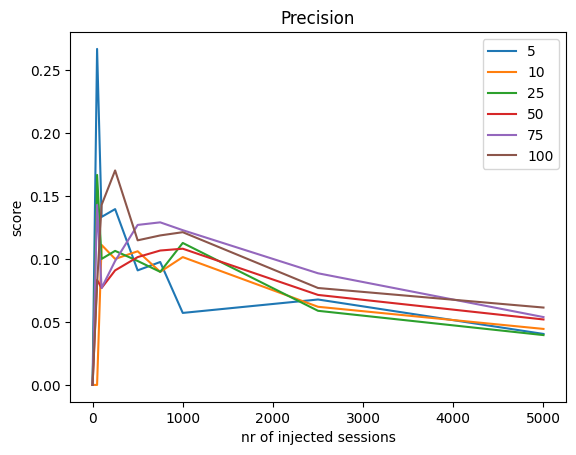

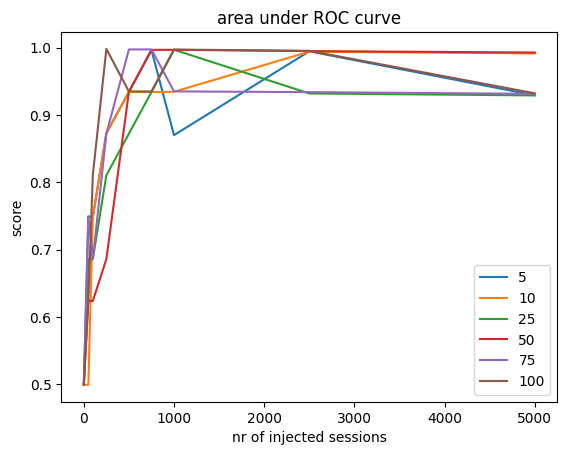

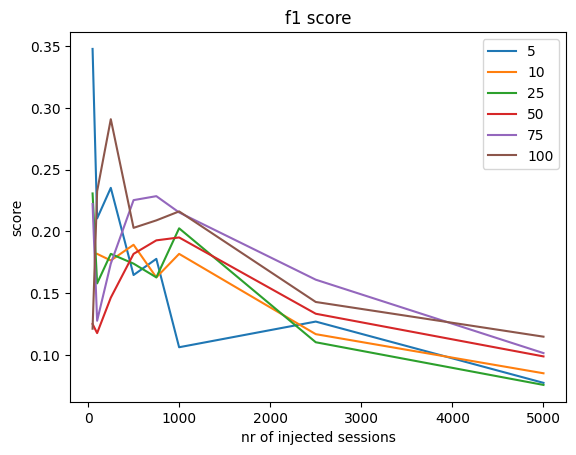

In [8]:
balanced_accuracy = plot_column(Activity,'ball_acc',"Balanced Accuracy")
recall = plot_column(Activity,'recall',"Recall")
precision = plot_column(Activity,'precision',"Precision")
roc = plot_column(Activity,'roc_auc_score','area under ROC curve') 
f1 = plot_column(Activity,'f1','f1 score')  

sample

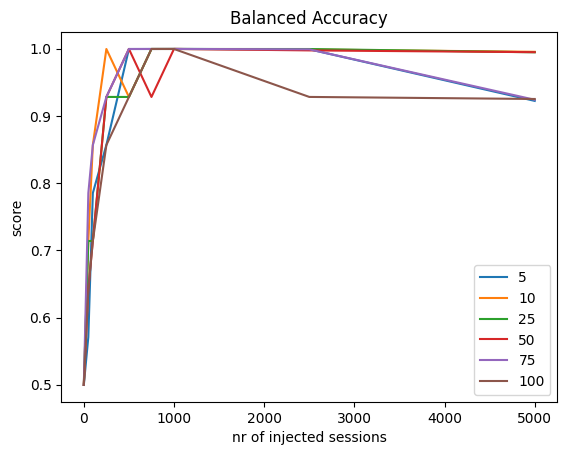

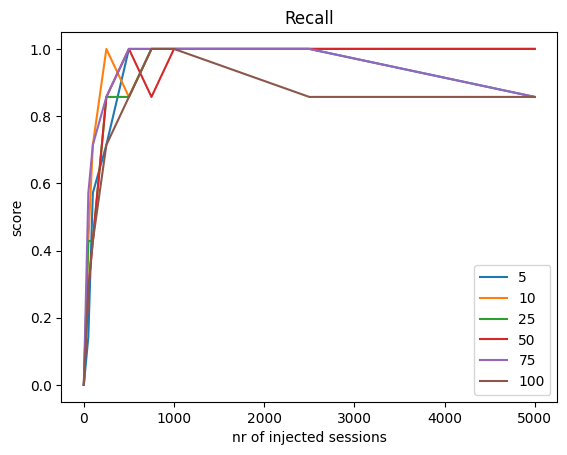

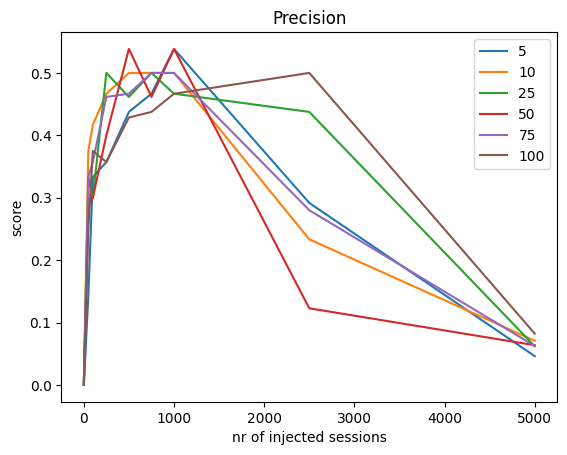

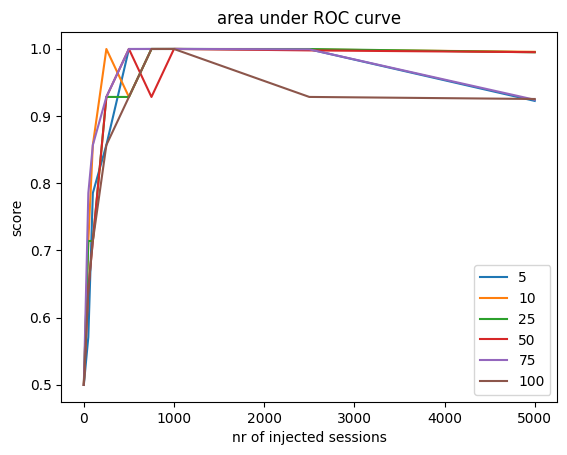

In [18]:
balanced_accuracy = plot_column(sample,'ball_acc',"Balanced Accuracy")
recall = plot_column(sample,'recall',"Recall")
precision = plot_column(sample,'precision',"Precision")
roc = plot_column(sample,'roc_auc_score','area under ROC curve') 

Activity_Patterns

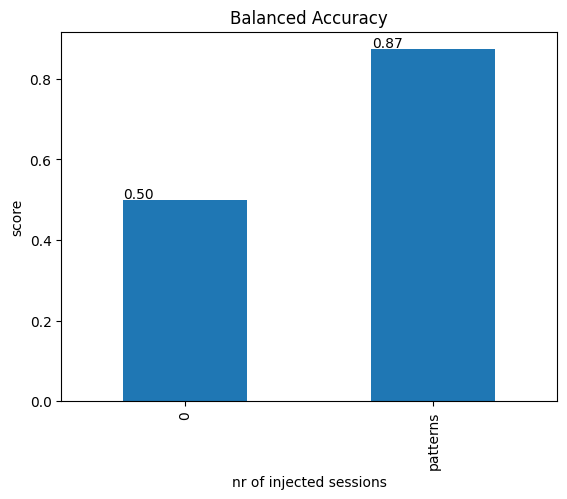

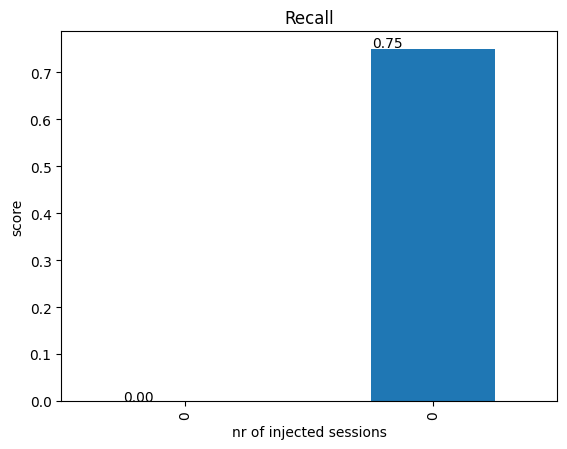

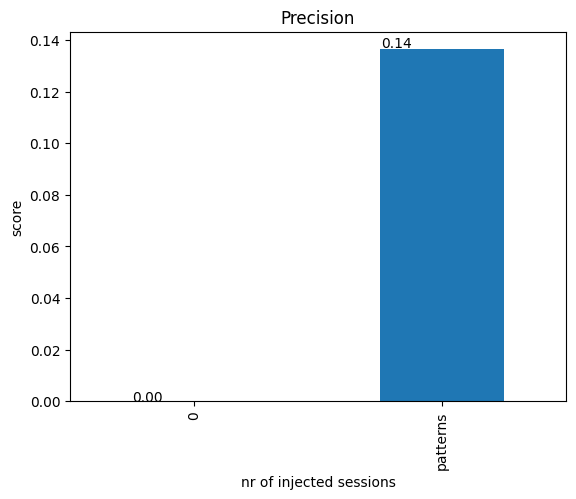

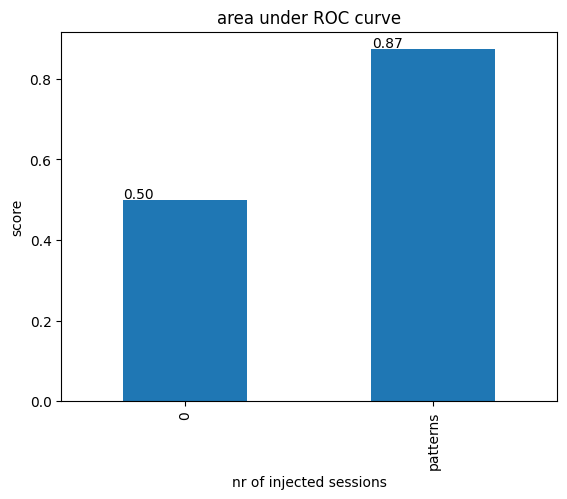

In [19]:
balanced_accuracy = plot_column_bar(Activity_Patterns,'ball_acc',"Balanced Accuracy",legend=False)
recall = plot_column_bar(Activity_Patterns,'recall',"Recall",'deviation_rate',legend=False)
precision = plot_column_bar(Activity_Patterns,'precision',"Precision",legend=False)
roc = plot_column_bar(Activity_Patterns,'roc_auc_score','area under ROC curve',legend=False) 

Transitions_Patterns

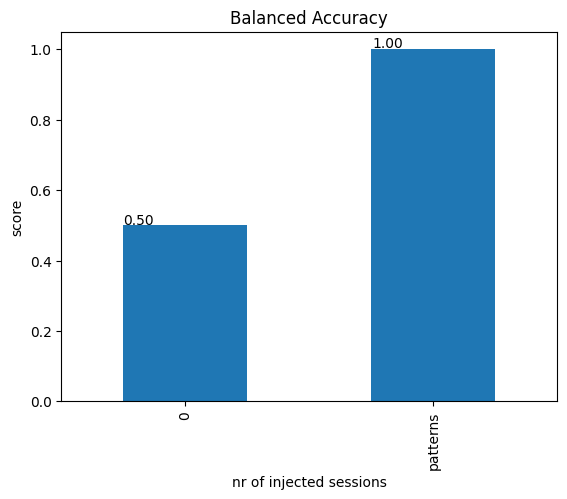

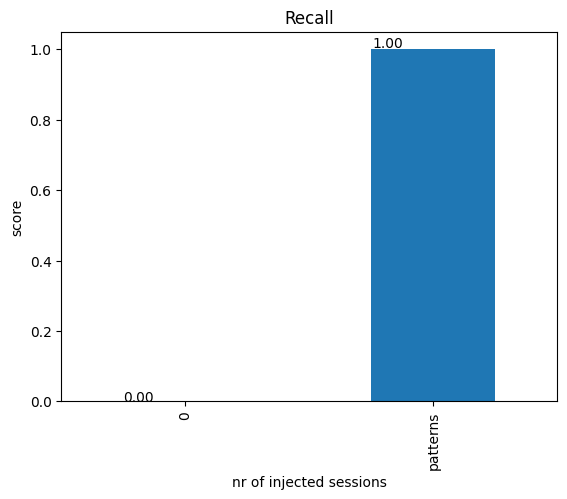

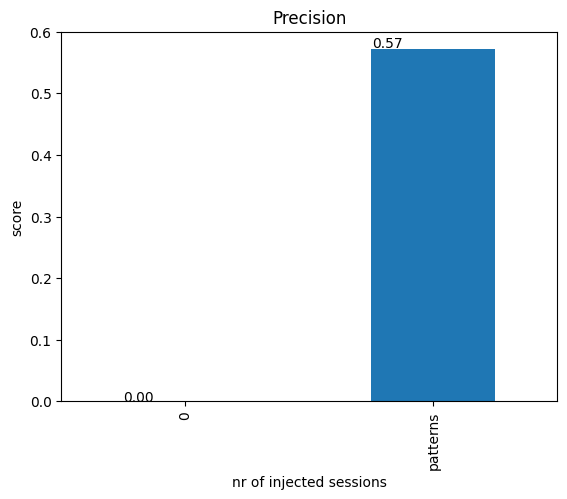

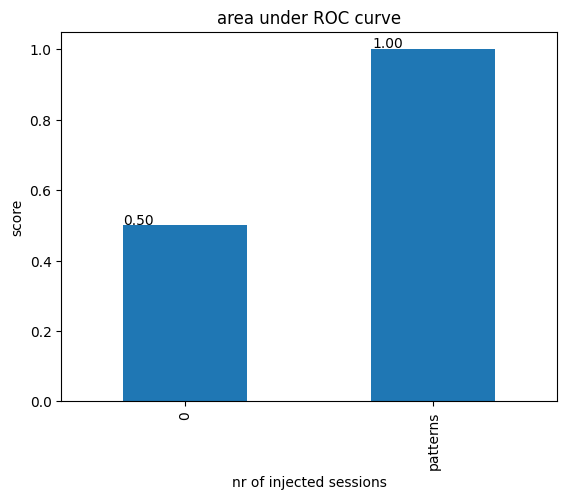

In [20]:
balanced_accuracy = plot_column_bar(Transitions_Patterns,'ball_acc',"Balanced Accuracy",legend=False)
recall = plot_column_bar(Transitions_Patterns,'recall',"Recall",legend=False)
precision = plot_column_bar(Transitions_Patterns,'precision',"Precision",legend=False)
roc = plot_column_bar(Transitions_Patterns,'roc_auc_score','area under ROC curve',legend=False) 